- 데이터의 결측치 및 이상치 확인
	- 데이터에 결측치가 있는지 확인하고 처리하라.
	- 데이터에 이상치가 있는지 확인하고 처리하라.
- 시각화를 통한 탐색
	- 사용자별/영화별 평점 분포를 히스토그램, 박스 플롯 등으로 시각화하라. (Histogram)

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
import pandas as pd

plt.rcParams['font.family'] = 'D2coding'
plt.rcParams['font.size'] = 9
plt.rcParams['axes.unicode_minus'] = False

from kmr_dataset import get_paths

In [47]:
path = get_paths(size='small')[3]
df_movies = pd.read_csv(path, sep='\t')

rows_with_missing = df_movies[df_movies.isnull().any(axis=1)]
print(rows_with_missing)

movie_null = df_movies.isnull().sum()
print(movie_null)
print()
print(f'전체 영화: {len(df_movies)}')
print(f'결측치 제외: {len(df_movies.dropna())}')

     movie   title                 title_eng  year     grade
9    10010   슈퍼맨 3       Superman III , 1983   NaN    전체 관람가
30   10031    죠스 3           Jaws 3-D , 1983   NaN   15세 관람가
31   10032    죠스 4  Jaws: The Revenge , 1987   NaN     PG-13
50   10051   싸이코 2          Psycho II , 1983   NaN  청소년 관람불가
51   10052   싸이코 3         Psycho III , 1986   NaN  청소년 관람불가
..     ...     ...                       ...   ...       ...
992  10993     톰 혼           Tom Horn , 1980   NaN         R
994  10995  공포의 여정  Journey Into Fear , 1975   NaN        PG
995  10996  버스틴 루즈      Bustin' Loose , 1981   NaN         R
996  10997   블랙 엔젤          Mausoleum , 1983   NaN  청소년 관람불가
998  10999  프랑켄슈타인       Frankenstein , 1931   NaN        NR

[400 rows x 5 columns]
movie          0
title          7
title_eng      8
year         390
grade         42
dtype: int64

전체 영화: 999
결측치 제외: 599


In [48]:
path = get_paths(size='small')[0]
df_castings = pd.read_csv(path, sep=',')

print(f'전체 영화: {len(df_castings)}')
print(f'결측치 제외: {len(df_castings.dropna())}')

전체 영화: 9776
결측치 제외: 9776


In [49]:
path = get_paths(size='small')[1]
df_countries = pd.read_csv(path, sep=',')

print(f'전체 영화: {len(df_countries)}')
print(f'결측치 제외: {len(df_countries.dropna())}')

전체 영화: 1109
결측치 제외: 1109


In [50]:
path = get_paths(size='small')[2]
df_genres = pd.read_csv(path, sep=',')

print(f'전체 영화: {len(df_genres)}')
print(f'결측치 제외: {len(df_genres.dropna())}')

전체 영화: 2025
결측치 제외: 2025


In [51]:
path = get_paths(size='small')[4]
df_people = pd.read_csv(path, sep='\t')

print(f'전체 영화: {len(df_people)}')
print(f'결측치 제외: {len(df_people.dropna())}')

print()

rows_with_missing = df_people[df_people.isnull().any(axis=1)]
print(rows_with_missing)

전체 영화: 7172
결측치 제외: 6305

      people korean original
243      636     황점      NaN
254      659     전준      NaN
389      970     황빈      NaN
659     1672    강리나      NaN
661     1675    강문영      NaN
...      ...    ...      ...
7157  353351    공소야      NaN
7161  372529    이정은      NaN
7167  390433    김형진      NaN
7168  398299    이정진      NaN
7171  420466    김미란      NaN

[867 rows x 3 columns]


In [52]:
path = get_paths(size='small')[5]
df_rates = pd.read_csv(path, sep=',')

print(f'전체 영화: {len(df_rates)}')
print(f'결측치 제외: {len(df_rates.dropna())}')

전체 영화: 140710
결측치 제외: 140710


In [53]:
#  이상치
valid_years = (df_movies['year'] < 1900) | (df_movies['year'] > 2024)

df_cleaned = df_movies[valid_years]
print(df_cleaned)

Empty DataFrame
Columns: [movie, title, title_eng, year, grade]
Index: []


user
0        85
1         1
2        15
3        92
4        71
         ..
52023     1
52024     1
52025     1
52026     1
52027     1
Length: 52028, dtype: int64


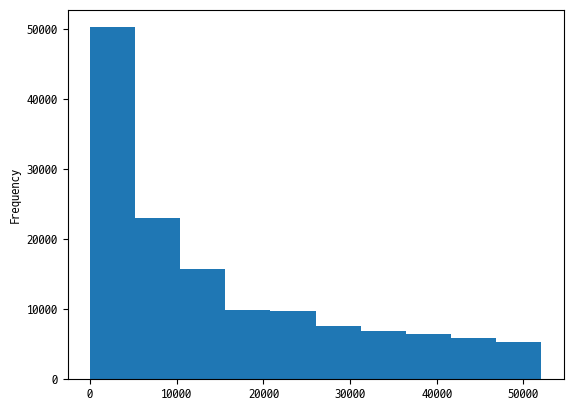

In [71]:
df_rates['user'].plot(kind='hist')

print(df_rates.groupby('user').size())
plt.show()

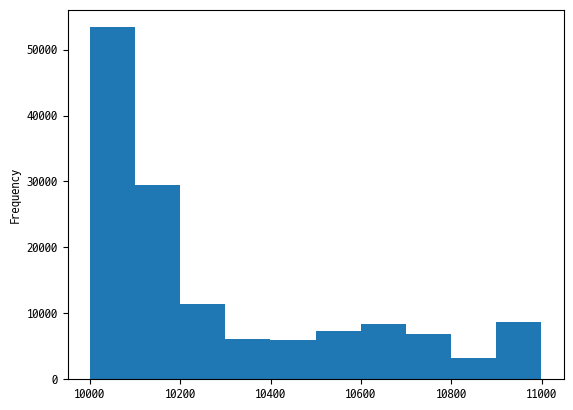

In [75]:
df_rates['movie'].plot(kind='hist')
plt.show()

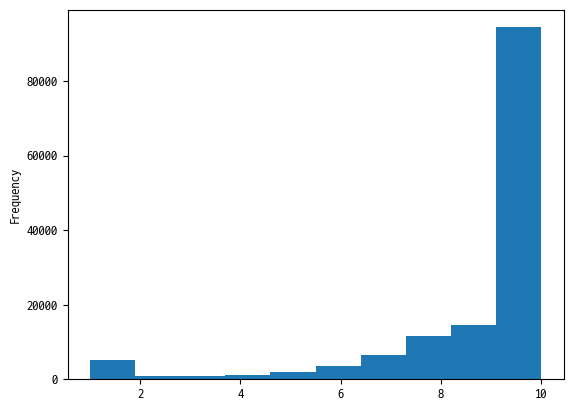

In [56]:
df_rates['rate'].plot(kind='hist')
plt.show()

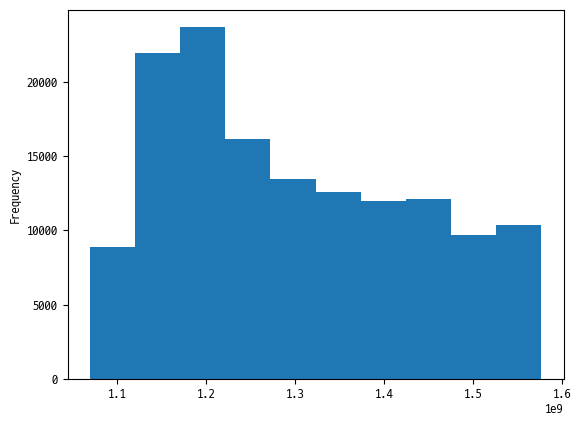

In [57]:
df_rates['time'].plot(kind='hist')
plt.show()

/tmp/ipykernel_400908/3676260917.py:3: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'M' instead.
  tmp['time'] = pd.to_datetime(tmp['time']).dt.to_period('m')


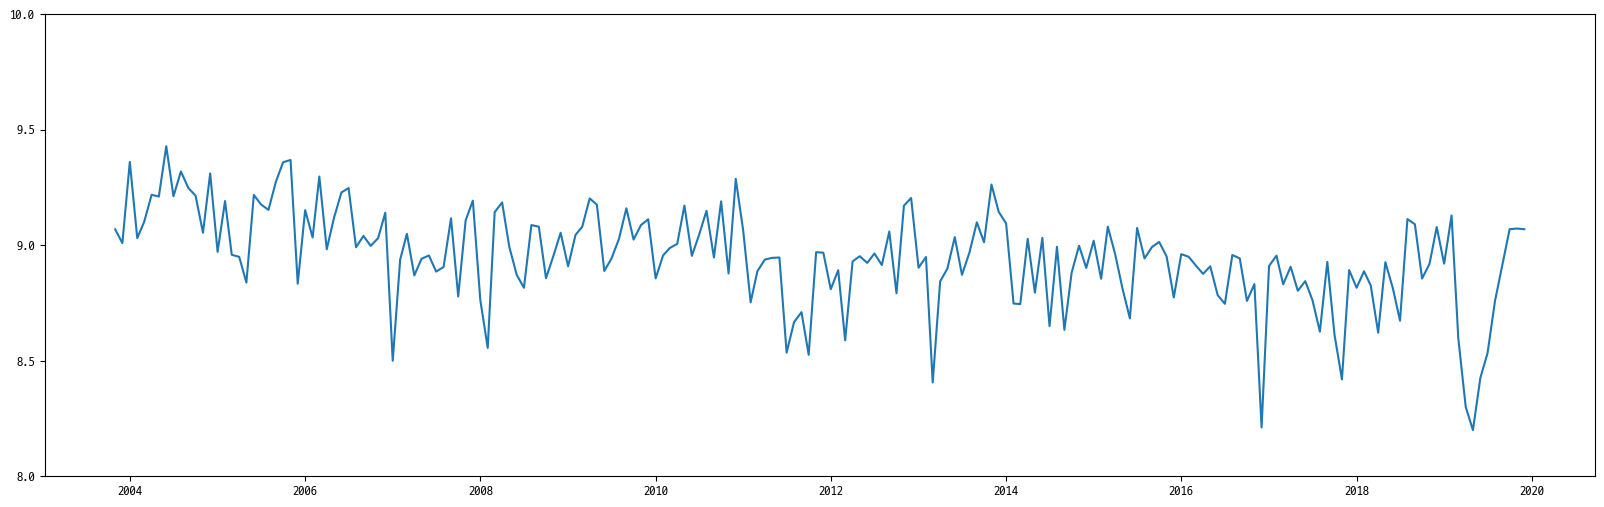

In [58]:
tmp = df_rates.copy()
tmp['time'] = pd.to_datetime(df_rates['time'], unit='s')
tmp['time'] = pd.to_datetime(tmp['time']).dt.to_period('m')

tmp = tmp.groupby('time').agg({'rate': 'mean'}).reset_index()
tmp['time'] = tmp['time'].dt.to_timestamp()

plt.figure(figsize=(20, 6))
plt.plot(tmp['time'], tmp['rate'])
plt.ylim(8, 10)
plt.gca().yaxis.set_major_locator(MultipleLocator(0.5))

plt.show()

In [59]:
from scipy.stats import zscore

df_rates['z_score'] = zscore(df_rates['rate'])
df_rates = df_rates[(df_rates['z_score'] < 3) & (df_rates['z_score'] > -3)].reset_index(drop=True)

/tmp/ipykernel_400908/2804036142.py:3: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'M' instead.
  tmp['time'] = pd.to_datetime(tmp['time']).dt.to_period('m')


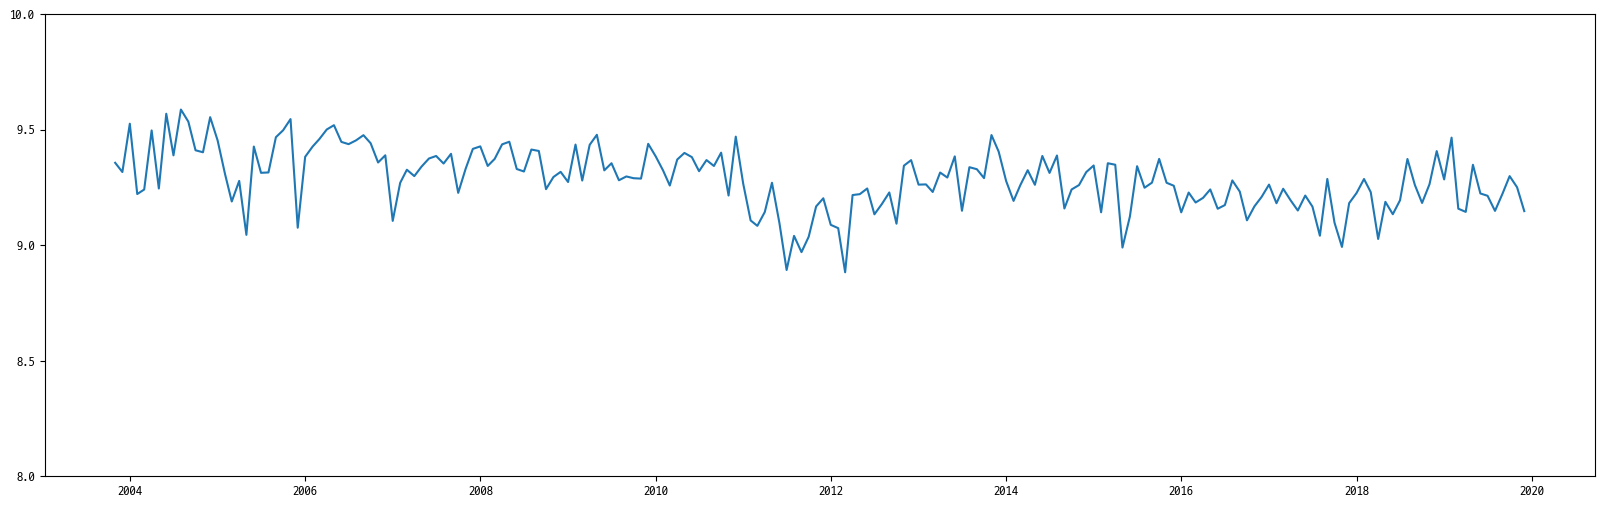

In [60]:
tmp = df_rates.copy()
tmp['time'] = pd.to_datetime(df_rates['time'], unit='s')
tmp['time'] = pd.to_datetime(tmp['time']).dt.to_period('m')

tmp = tmp.groupby('time').agg({'rate': 'mean'}).reset_index()
tmp['time'] = tmp['time'].dt.to_timestamp()

plt.figure(figsize=(20, 6))
plt.plot(tmp['time'], tmp['rate'])
plt.ylim(8, 10)
plt.gca().yaxis.set_major_locator(MultipleLocator(.5))

plt.show()

In [61]:
# 데이터 읽기
df_movies = df_movies.dropna()
df_movies['year'] = df_movies['year'].astype(int)

path = get_paths(size='small')[5]
df_rates = pd.read_csv(path, sep=',')

df_movie_rates = df_rates.groupby('movie').agg({'rate': 'mean', 'user': 'count'}).reset_index()

df_movie_rates = pd.merge(df_movie_rates, df_movies[['movie', 'title', 'title_eng', 'year']], on='movie')

df_movie_rates['z_score'] = zscore(df_movie_rates['user'])

df_movie_rates_t1 = df_movie_rates[df_movie_rates['user'] > 100].reset_index(drop=True)

df_movie_rates_t1.sort_values('rate', ascending=False).head(30)


,movie,rate,user,title,title_eng,year,z_score
214,10940,9.580882,136,베어,"L'Ours , The Bear , 1988",1992,-0.163731
123,10306,9.489286,280,프로젝트 A,"A 計劃: , Project A , 1983",2015,0.069586
168,10588,9.469512,164,수잔 브링크의 아리랑,"Susan Brink's Arirang , 1991",1991,-0.118364
122,10301,9.462766,188,시티 라이트,"City Lights , 1931",2015,-0.079478
96,10200,9.434136,7265,터미네이터 2:오리지널,"Terminator 2: Judgment Day , 1991",2019,11.387087
1,10002,9.416778,3004,빽 투 더 퓨쳐,"Back To The Future , 1985",2015,4.483168
65,10102,9.401503,4391,사운드 오브 뮤직,"The Sound Of Music , 1965",2017,6.730466
12,10016,9.399851,4029,나 홀로 집에,"Home Alone , 1990",1991,6.143932
38,10048,9.378706,7016,죽은 시인의 사회,"Dead Poets Society , 1989",2016,10.983643
76,10115,9.370229,262,용형호제 2 - 비룡계획,"飛鷹計劃 , Armour Of God II: Operation Condor , 1990",2015,0.040421


In [78]:
df_movie_rates_t2 = df_movie_rates[df_movie_rates['z_score'] > 1].reset_index(drop=True)
df_movie_rates_t2.sort_values('rate', ascending=False).head(30)

,movie,rate,user,title,title_eng,year,z_score
22,10200,9.434136,7265,터미네이터 2:오리지널,"Terminator 2: Judgment Day , 1991",2019,11.387087
1,10002,9.416778,3004,빽 투 더 퓨쳐,"Back To The Future , 1985",2015,4.483168
18,10102,9.401503,4391,사운드 오브 뮤직,"The Sound Of Music , 1965",2017,6.730466
4,10016,9.399851,4029,나 홀로 집에,"Home Alone , 1990",1991,6.143932
12,10048,9.378706,7016,죽은 시인의 사회,"Dead Poets Society , 1989",2016,10.983643
10,10038,9.343516,1735,에이리언 2,"Aliens , 1986",1986,2.427061
24,10249,9.341379,1160,모던 타임즈,"Modern Times , 1936",2015,1.495413
21,10114,9.339538,2901,아마데우스,"Amadeus , 1984",2015,4.316282
7,10021,9.317726,1196,록키,"Rocky , 1976",2017,1.553742
31,10670,9.295073,1847,천녀유혼,"倩女幽魂 , A Chinese Ghost Story , 1987",2019,2.608530


      user  movie  rate        time
0     1020  10940     8  1074265200
1     4343  10940    10  1076813760
2    17258  10940    10  1078564380
3    48384  10940    10  1084098720
4     1911  10940    10  1102572240
..     ...    ...   ...         ...
131  45875  10940    10  1556288640
132  50847  10940    10  1559235780
133  16179  10940     8  1562253360
134  10856  10940    10  1569682860
135    385  10940     6  1575421200

[136 rows x 4 columns]


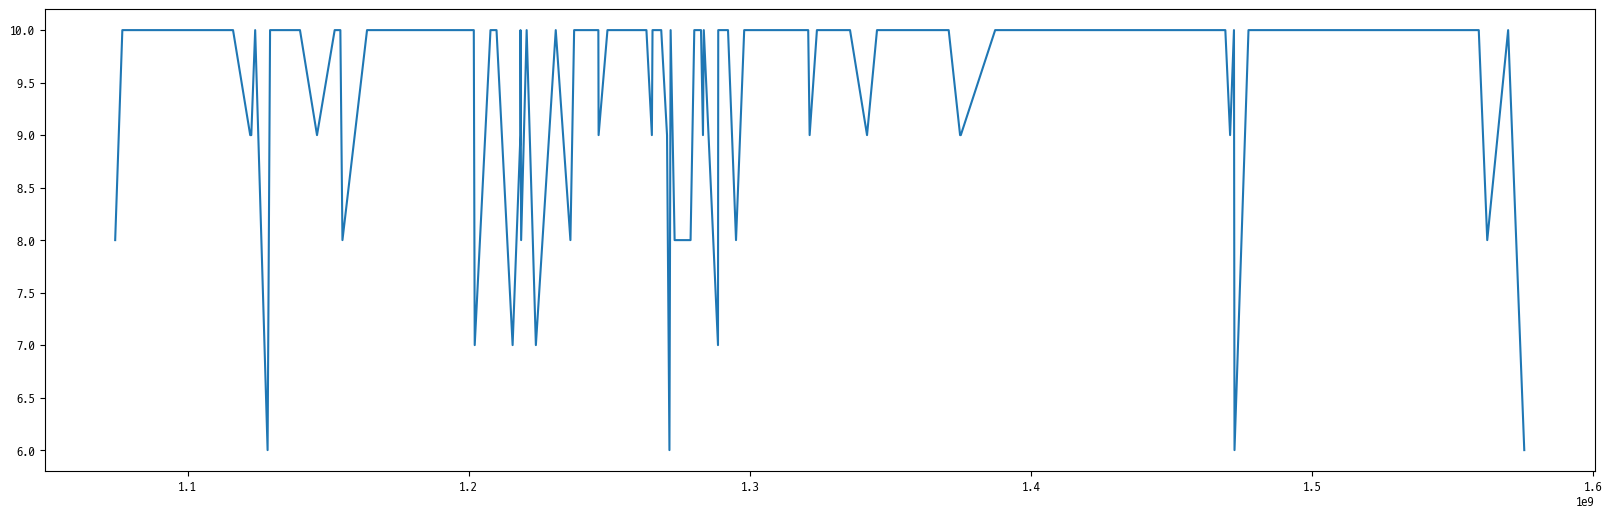

In [63]:
terminater = df_rates[df_rates['movie'] == 10940].sort_values('time').reset_index(drop=True)
print(terminater)

plt.figure(figsize=(20, 6))
plt.plot(terminater['time'], terminater['rate'])

In [64]:
df_movie_rates.sort_values('user', ascending=False).head(30)

,movie,rate,user,title,title_eng,year,z_score
161,10200,9.434136,7265,터미네이터 2:오리지널,"Terminator 2: Judgment Day , 1991",2019,11.387087
44,10048,9.378706,7016,죽은 시인의 사회,"Dead Poets Society , 1989",2016,10.983643
83,10102,9.401503,4391,사운드 오브 뮤직,"The Sound Of Music , 1965",2017,6.730466
14,10016,9.399851,4029,나 홀로 집에,"Home Alone , 1990",1991,6.143932
559,10936,9.250949,3690,가위손,"Edward Scissorhands , 1990",2014,5.594665
0,10001,9.294360,3635,시네마 천국,"Cinema Paradiso , 1988",2013,5.505551
1,10002,9.416778,3004,빽 투 더 퓨쳐,"Back To The Future , 1985",2015,4.483168
64,10071,9.181081,2960,대부,"Mario Puzo's The Godfather , 1972",2010,4.411877
94,10114,9.339538,2901,아마데우스,"Amadeus , 1984",2015,4.316282
90,10110,9.203252,2214,영웅본색,"英雄本色 , A Better Tomorrow , 1986",2016,3.203164


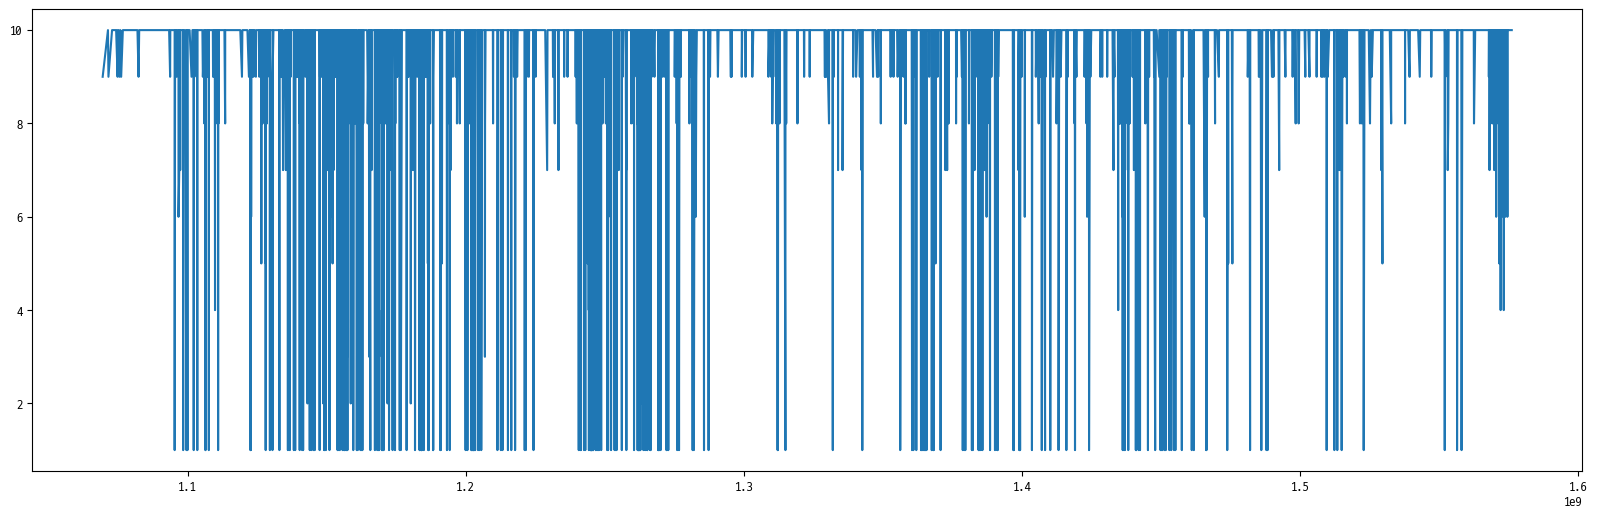

In [65]:
terminater = df_rates[df_rates['movie'] == 10200].sort_values('time').reset_index(drop=True)

plt.figure(figsize=(20, 6))
plt.plot(terminater['time'], terminater['rate'])


/tmp/ipykernel_400908/4194335995.py:2: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'M' instead.
  terminater['time'] = pd.to_datetime(terminater['time'], unit='s').dt.to_period('m')


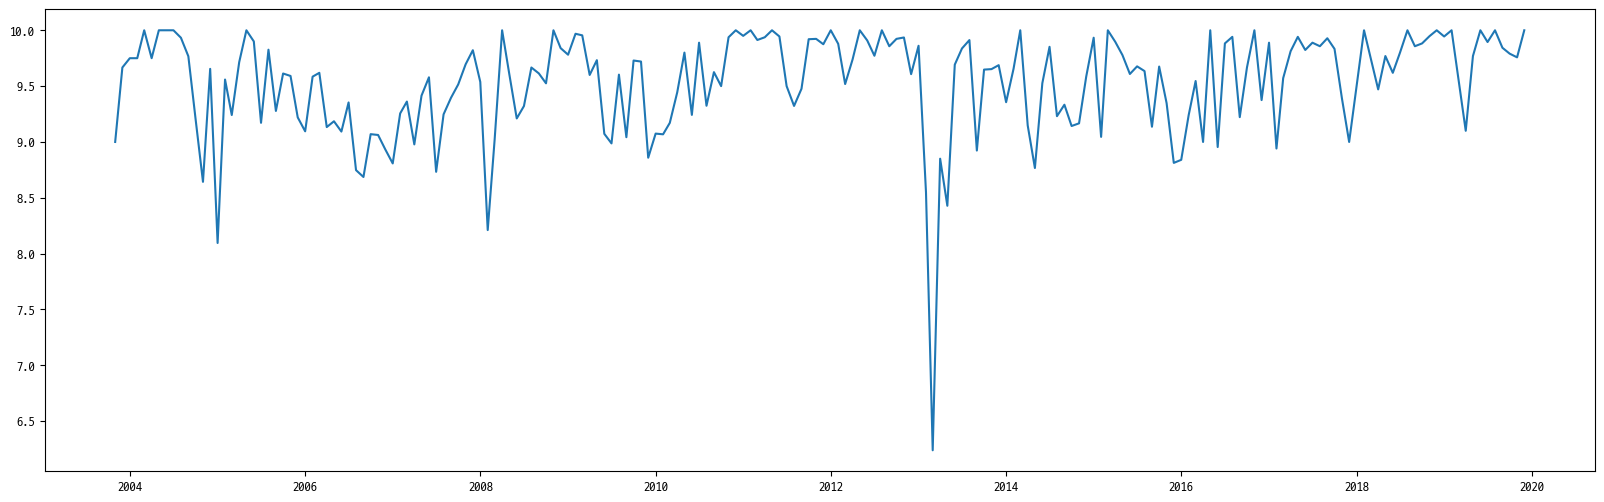

In [66]:
terminater = df_rates[df_rates['movie'] == 10200].sort_values('time').reset_index(drop=True)
terminater['time'] = pd.to_datetime(terminater['time'], unit='s').dt.to_period('m')
terminater = terminater.groupby('time').agg({'rate': 'mean'}).reset_index().sort_values('time')
terminater['time'] = terminater['time'].dt.to_timestamp()

plt.figure(figsize=(20, 6))
plt.plot(terminater['time'], terminater['rate'])